In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist=tf.keras.datasets.mnist

mnist

In [3]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

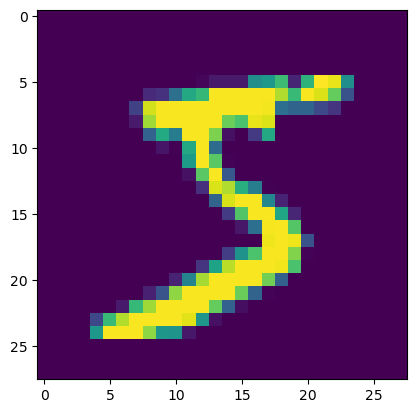

5

In [4]:
xtrain=xtrain/255
xtest=xtest/255
plt.imshow(xtrain[0])
plt.show()
ytrain[0]

In [5]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

C:\Users\shich\anaconda3\envs\datascience\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
loss=tf.keras.losses.SparseCategoricalCrossentropy()

In [8]:
model.compile(
    optimizer='adam',
    loss=loss,
    metrics=['accuracy']
)

In [9]:
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2)
model.fit(xtrain,ytrain,validation_split=0.1,epochs=10,callbacks=[early_stop])

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 798us/step - accuracy: 0.8534 - loss: 0.4914 - val_accuracy: 0.9655 - val_loss: 0.1211
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 730us/step - accuracy: 0.9637 - loss: 0.1187 - val_accuracy: 0.9715 - val_loss: 0.0949
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 730us/step - accuracy: 0.9756 - loss: 0.0789 - val_accuracy: 0.9743 - val_loss: 0.0869
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 753us/step - accuracy: 0.9815 - loss: 0.0604 - val_accuracy: 0.9730 - val_loss: 0.0956
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 731us/step - accuracy: 0.9849 - loss: 0.0469 - val_accuracy: 0.9745 - val_loss: 0.0909


In [10]:
model.evaluate(xtest,ytest,verbose=2)

313/313 - 0s - 477us/step - accuracy: 0.9718 - loss: 0.1011


[0.10110072791576385, 0.9718000292778015]

In [11]:
ypred=np.argmax(model.predict(xtest),axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step


In [12]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [13]:
cm=confusion_matrix(ypred,ytest)

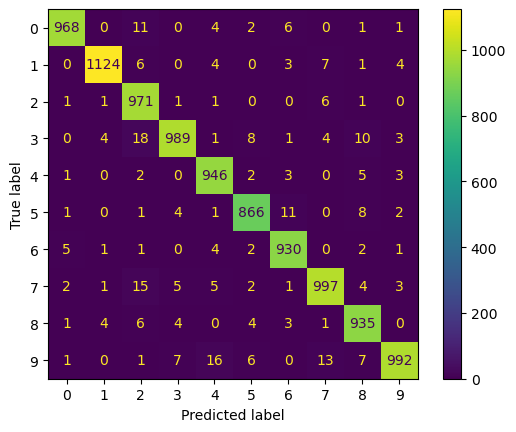

In [14]:
cmd=ConfusionMatrixDisplay(cm)
cmd.plot()